In [ ]:
import Pkg; Pkg.activate("../"); Pkg.instantiate()

In [1]:
using LinearAlgebra
using BlockDiagonals
using ForwardDiff
using ControlSystems
using ComponentArrays
using Parameters: @unpack
using StaticArrays
using Plots

In [9]:
# include dependencies
include("../src/utils.jl")
include("../src/ExpDynamicsLibrary.jl")
include("../src/RefTrajectoryLibrary.jl")
include("../src/ExpControllerLibrary.jl")
include("../src/Visualization.jl")
include("../src/RefTrajectoryLibrary.jl")

Main.RefTrajLib

In [10]:
include("../src/ExpmeSchDI2_mobile.jl")

Main.meSchExpDImobile

In [20]:
## Testing meSch

# Initial state
soc_init = 40.0
N = 1.0
int_pos_1 = [-N; 0.0; 0.0]
int_pos_2 = [N; 0.0; 0.0]
rover_init_pos = [0.0; 0; 0] 
# Get the quad_parameters
quad_p = ExpDyn.quadrotor_parameters

## Define the quad's initial condition
quad1_ic = ComponentArray(
    x = int_pos_1,
    v = zeros(3),
    R = 1.0(I(3)) |> collect, 
    Ω = zeros(3),
    ω = 2*ExpDyn.hover_ω(quad_p),
    soc = soc_init
);

quad2_ic = ComponentArray(
    x = int_pos_2,
    v = zeros(3),
    R = 1.0(I(3)) |> collect, 
    Ω = zeros(3),
    ω = 2*ExpDyn.hover_ω(quad_p),
    soc = soc_init
);

rover_ic = ComponentArray(
    pos = rover_init_pos,
    phi = 0.0
)

discharge_rate = 0.6667
T_SIM = 150.0

sys_ic = ComponentArray(
    quad1 = quad1_ic,
    quad2 = quad2_ic,
    rover = rover_ic,
)

sol_nc, params = meSchExpDImobile.simulate(sys_ic, 0., T_SIM, discharge_rate)
X1 = sol_nc.u;
# T = sol_nc.t;
# println("size of state vecs: $(size(sol_nc.u))")
# println("size of state vecs: $(size(sol_nc.t))")

=========== In recompute_committed ==============
Current time: 0.0
integrator.p[1][i].charge_start_time: 0.0
charge_time_dur: 5.0
integrator.p[1][i].landed : 0
integrator.u[quad_keys[i]].soc : 40.0
current_soc: 40.0
integrator.p[1][i].charge_start_time: 0.0
charge_time_dur: 5.0
integrator.p[1][i].landed : 0
integrator.u[quad_keys[i]].soc : 40.0
current_soc: 40.0
Remaining flight time 1st quad: 59.9970001499925
Remaining flight time: 59.9970001499925
TC: 8.9
TF - TC > k(T_c + T_delta): 51.0970001499925 > 16.0
Expected gap: 35.0970001499925
Gap satisfied: true
current time: 0.0
GAP FLAG: false
=========== Out recompute_committed ==============
=========== In recompute_committed ==============
Current time: 1.0
integrator.p[1][i].charge_start_time: 0.0
charge_time_dur: 5.0
integrator.p[1][i].landed : 0
integrator.u[quad_keys[i]].soc : 39.33329999999997
current_soc: 39.33329999999997
integrator.p[1][i].charge_start_time: 0.0
charge_time_dur: 5.0
integrator.p[1][i].landed : 0
integrator.u[

┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex ~/.julia/packages/Convex/uI27T/src/solution.jl:263


Remaining flight time 1st quad: 16.70700014999056
Remaining flight time: 31.477000149993696
TC: 8.900000000000006
TF - TC > k(T_c + T_delta): 22.57700014999369 > 16.0
Expected gap: 6.57700014999369
Gap satisfied: true
current time: 85.0
GAP FLAG: false
=========== Out recompute_committed ==============
=========== In recompute_committed ==============
Current time: 86.0
integrator.p[1][i].charge_start_time: 41.71
charge_time_dur: 5.0
integrator.p[1][i].landed : 0
integrator.u[quad_keys[i]].soc : 10.471856999998714
current_soc: 10.471856999998714
integrator.p[1][i].charge_start_time: 56.480000000000004
charge_time_dur: 5.0
integrator.p[1][i].landed : 0
integrator.u[quad_keys[i]].soc : 20.319016000000804
current_soc: 20.319016000000804
Remaining flight time 1st quad: 15.707000149990572
Remaining flight time: 30.47700014999371
TC: 8.900000000000006
TF - TC > k(T_c + T_delta): 21.577000149993705 > 16.0
Expected gap: 5.5770001499937045
Gap satisfied: true
current time: 86.0
GAP FLAG: false


In [21]:
params[1][2].charge_pos

3-element Vector{Float64}:
  0.8877692994169295
 -0.4081959604334044
  0.4

In [22]:
sol_nc.u[10].rover

ComponentVector{Float64,SubArray...}(pos = [0.009267576796723269, 8.237797608794405e-5, 0.0], phi = 0.01744718562496137)

In [23]:
include("../src/RefTrajectoryLibrary.jl")

Main.RefTrajLib

In [24]:
#Set up visualization
using TrajOptPlots
using MeshCat
using StaticArrays
using RobotZoo:Quadrotor

vis = Visualizer()
render(vis)

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8702


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), Set{Any}(), ip"127.0.0.1", 8702))

In [25]:
# [Trajectories] Create and Visualize the reference trajectories
include("../src/RefTrajectoryLibrary.jl")
include("../src/Visualization.jl")
# For Quad 1
t0 = 0.
N = 1200
traj_type = 1
dt = 0.05

# Draw first trajectory
Xref_1, Uref1 = RefTrajLib.get_desired_trajectory(t0, traj_type, N, dt, 1); # The last argument is for the param type
Xref_2, Uref2 = RefTrajLib.get_desired_trajectory(t0, traj_type, N, dt, 2); # The last argument is for the param type
rover_ref = RefTrajLib.get_desired_trajectory_eight(t0, 1500, dt); # The last argument is for the param type
Visualization.vis_traj!(vis, 1, :traj_1, Xref_1[1:1100]; R = 0.01, color = MeshCat.RGBA(1.0, 0.0, 0.0, 2.5))
Visualization.vis_traj!(vis, 1, :traj_2, Xref_2[1:1100]; R = 0.01, color = MeshCat.RGBA(1.0, 1.0, 0.0, 2.5))
Visualization.vis_traj!(vis, 1, :traj_3, rover_ref; R = 0.01, color = MeshCat.RGBA(1.0, 1.0, 0.0, 2.5))

In [26]:
# setobject!(vis, HyperRectangle(Vec(0., 0, 0), Vec(1., 1, 1)), MeshCat.MeshPhongMaterial(color = MeshCat.RGBA(0.0,1.0,0.0,0.2)))
# settransform!(vis, MeshCat.Translation(-0.5, -0.5, 0))
# # setprop!(vis, "material.opacity", 0.5)  # Correct usage of setprop!

### Draw Bounds

In [27]:
X_bound = [[1.786, -1.458, 1.0],
            [0.2795, -1.5, 1.0],
            [-2.345, -1.54, 1.0],
            [-2.370, 1.356, 1.0],
            [-1.194, 1.949, 1.0],
            [0.0, 2.360, 1.0],
            [0.958, 2.046, 1.0],
            [1.786, 1.356, 1.0],
            [1.786, -1.458, 1.0]]

# Generate 100 values for z from 0 to 2.0
z_values = range(0, stop=2.0, length=100)

# Generate the 500-element vector (each with 100 points)
points = [[x, y, z] for (x, y, _) in X_bound for z in z_values];

Visualization.vis_traj!(vis, 2, :lab_bound, points; R = 0.01, color = MeshCat.RGBA(0.0, 1.0, 0.0, 2.5))

In [28]:
# [Quadrotors] Visualize the Quadrotors  + rover
Visualization.N_animate_system_geometric_rover!(vis, X1, 2, 0.01)

In [34]:
charge_dist_1 = params[1][1].charge_dist
charge_dist_2 = params[1][2].charge_dist

15000-element Vector{Float64}:
 1.0
 0.9967913579854977
 0.9934406343352155
 0.989967225974679
 0.986391842130125
 0.9827353375958567
 0.9790184757186767
 0.9752601158866786
 0.9714786957118844
 0.9676932887268168
 0.9639239366948447
 0.960190367738424
 0.9565079593927724
 ⋮
 2.292769447292452
 2.290201855941585
 2.287611909834497
 2.2849999303266073
 2.282366241648492
 2.279711173098065
 2.277035059827136
 2.274338242420152
 2.2716210655984863
 2.268883876959424
 2.26612702914886
 2.263350880640705

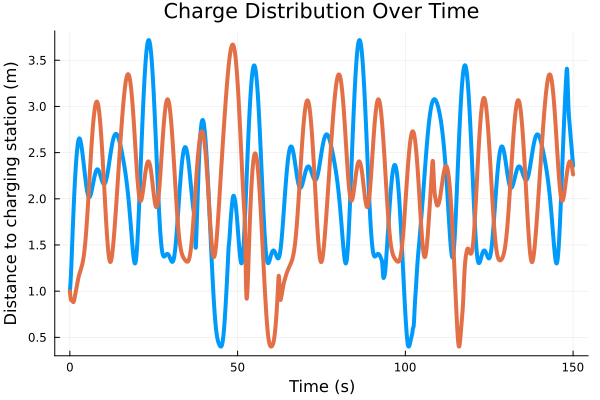

In [46]:
# Extract charge distributions
charge_dists = [params[1][i].charge_dist for i in 1:2]

# Total duration
total_time = 150

# Create a plot
plot()

# Plot each charge distribution with time on the x-axis
for i in 1:2
    num_points = length(charge_dists[i])
    time = range(0, total_time, length=num_points)  # Create time vector
    plot!(time, charge_dists[i], linewidth=4, label="")
end

# Show the plot
xlabel!("Time (s)")
ylabel!("Distance to charging station (m)")
title!("Charge Distribution Over Time")
display(plot!())

In [47]:
savefig("charge_dist_quad_rover.svg")

"/home/kbn/Kaleb_Data/PhD_Research/mEclares/exp_code/charge_dist_quad_rover.svg"

In [39]:
soc_values_1 = [sol_nc.u[i].quad1.soc for i in eachindex(sol_nc.u)]
soc_values_2 = [sol_nc.u[i].quad2.soc for i in eachindex(sol_nc.u)];

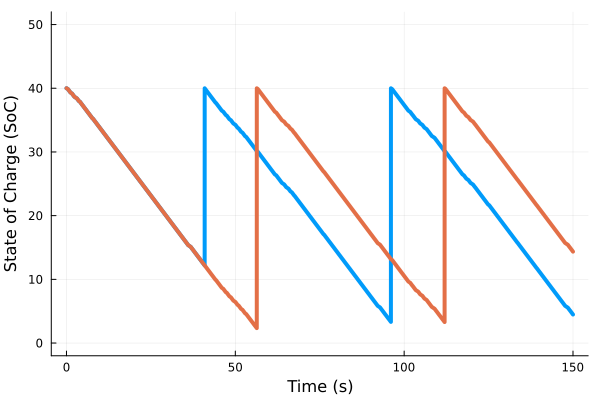

In [40]:
# Create time vector
num_points = length(soc_values_1)  # Assuming all soc_values have the same length
time = range(0, total_time, length=num_points)

# Create a plot
plot()

# Plot SOC values with customized appearance
plot!(time, soc_values_1, linewidth=4, label="")
plot!(time, soc_values_2, linewidth=4, label="")

# Set axis labels, title, and y-axis limits
xlabel!("Time (s)")
ylabel!("State of Charge (SoC)")
# title!("SOC Evolution Over Time")
ylims!(-2, 52)  # Set y-axis limits from 0 to 50

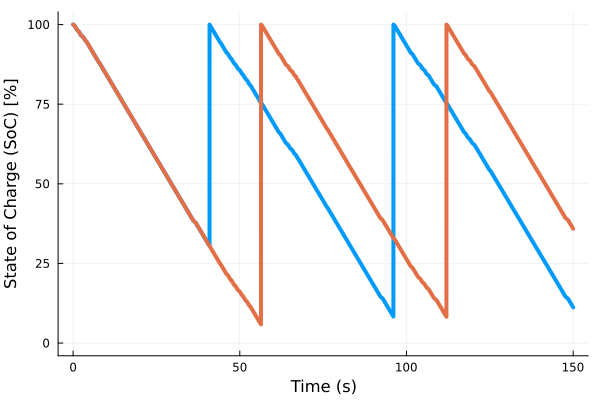

In [42]:
# Total duration
total_time = 150

# Create time vector
num_points = length(soc_values_1)  # Assuming all soc_values have the same length
time = range(0, total_time, length=num_points)

# Convert SoC values to percentage
soc_percentage_1 = soc_values_1 .* (100/40)
soc_percentage_2 = soc_values_2 .* (100/40)

# Create a plot
plot()

# Plot SOC percentages with customized appearance
plot!(time, soc_percentage_1, linewidth=4, label="")
plot!(time, soc_percentage_2, linewidth=4, label="")

# Set axis labels, title, and y-axis limits
xlabel!("Time (s)")
ylabel!("State of Charge (SoC) [%]")  # SoC in percentage
ylims!(-4, 104)  # Set y-axis limits from 0 to 100%


In [43]:
# Save as SVG
savefig("soc_percentage_evolution_quad_rover.svg")

"/home/kbn/Kaleb_Data/PhD_Research/mEclares/exp_code/soc_percentage_evolution_quad_rover.svg"